<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/Fashion_MNIST_50_epoch_ACC_90_77_(UPGRADABLE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.models import Sequential, load_model
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
num_classes = 10

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0],1,28,28))
X_test = X_test.reshape((X_test.shape[0],1,28,28))

X_train, X_test = X_train.astype("float32"), X_test.astype("float32")

X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
model = Sequential()

model.add(Conv2D(32, (1,1), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32 ,(1,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(1,1))
model.add(Dropout(0.3))

model.add(Conv2D(32, (1,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (1,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(1,1))
model.add(Dropout(0.3))


model.add(Conv2D(32,(1,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (1,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(1,1))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(2048))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 28, 32)         928       
_________________________________________________________________
activation_9 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 1, 28, 32)         128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 28, 32)         1056      
_________________________________________________________________
activation_10 (Activation)   (None, 1, 28, 32)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 1, 28, 32)         128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 28, 32)         0         
__________

In [0]:

#model = load_model("model.h5")
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [11]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 28s 470us/step - loss: 0.6553 - acc: 0.7653 - val_loss: 0.4759 - val_acc: 0.8364
Epoch 2/50
60000/60000 [==============================] - 26s 434us/step - loss: 0.4563 - acc: 0.8329 - val_loss: 0.4114 - val_acc: 0.8540
Epoch 3/50
60000/60000 [==============================] - 28s 468us/step - loss: 0.4137 - acc: 0.8472 - val_loss: 0.3886 - val_acc: 0.8577
Epoch 4/50
60000/60000 [==============================] - 26s 435us/step - loss: 0.3850 - acc: 0.8584 - val_loss: 0.3554 - val_acc: 0.8722
Epoch 5/50
60000/60000 [==============================] - 26s 434us/step - loss: 0.3637 - acc: 0.8652 - val_loss: 0.3561 - val_acc: 0.8707
Epoch 6/50
60000/60000 [==============================] - 28s 470us/step - loss: 0.3442 - acc: 0.8719 - val_loss: 0.3231 - val_acc: 0.8795
Epoch 7/50
60000/60000 [==============================] - 26s 432us/step - loss: 0.3283 - acc: 0.8766 - val_loss: 0.

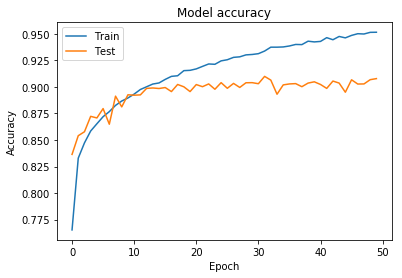

In [12]:
import matplotlib.pyplot as plt
# history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), verbose = 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save("model.h5")